In [1]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
#1. Retrieve and Load mnist_784 dataset

mnist = fetch_openml('mnist_784', version=1, as_frame=True)

In [3]:
# Check data shape
mnist.data.shape

(70000, 784)

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
# Check the data
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
# Check the shape of the data
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

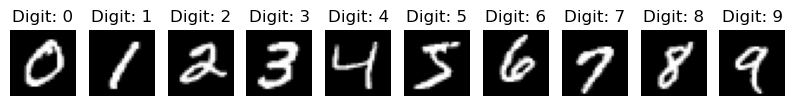

In [9]:
#2. Display each digit

# Function to plot a single digit
def plot_digit(data):
    # Convert the Series to a NumPy array and reshape it to 28x28
    image = np.array(data).reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.axis("off")
    
# Find the first occurrence of each digit (0 to 9)
unique_digits = list(map(int, sorted(np.unique(y))))  # Extract unique digits
first_occurrences = [np.where(y == str(i))[0][0] for i in unique_digits]  # Find the first index for each digit

# Plot one instance of each digit from 0 to 9
plt.figure(figsize=(10, 2))
for i, index in enumerate(first_occurrences):
    plt.subplot(1, 10, i + 1)
    plot_digit(X.iloc[index])
    plt.title(f"Digit: {i}")
plt.show()

In [10]:
#3. Use PCA to retrieve the 1st and 2nd principal components

# Apply PCA to the MNIST dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio of the 1st and 2nd components: {explained_variance_ratio}")


Explained variance ratio of the 1st and 2nd components: [0.09746116 0.07155445]


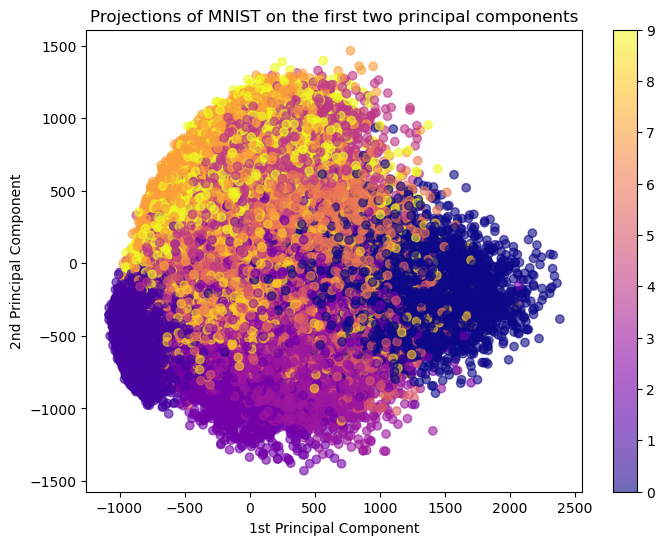

In [11]:
#4. Plot the projections of the 1st and 2nd principal components

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype(int), cmap="plasma", alpha=0.6)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.colorbar()
plt.title('Projections of MNIST on the first two principal components')
plt.show()


In [12]:
#5. Use incremental PCA to reduce the dimensionality

from sklearn.decomposition import IncrementalPCA

# Reduce the dimensionality to 154 components using Incremental PCA
n_components = 154
inc_pca = IncrementalPCA(n_components=n_components)
X_reduced = inc_pca.fit_transform(X)

print(f"Explained variance ratio of first 154 components: {sum(inc_pca.explained_variance_ratio_)}")


Explained variance ratio of first 154 components: 0.9500165146603108


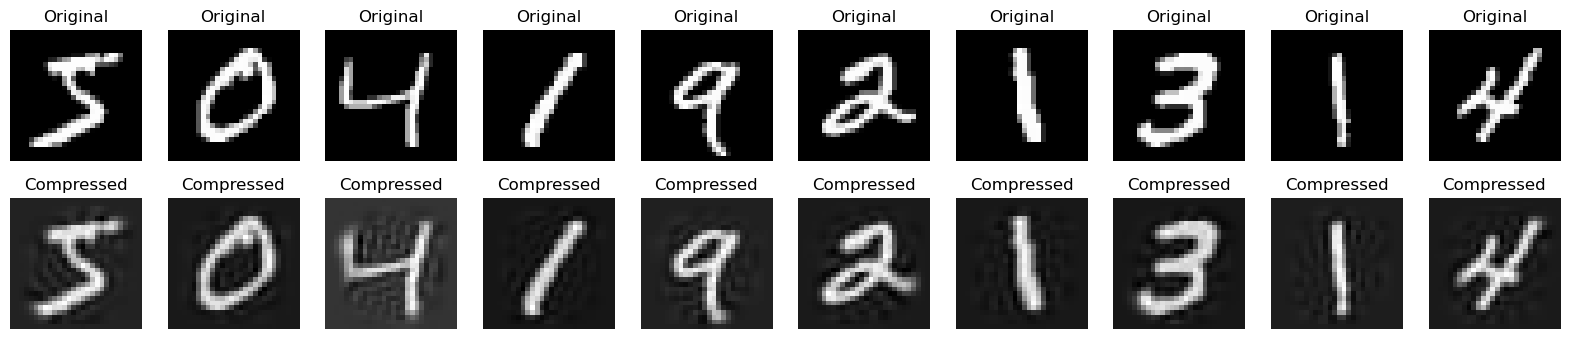

In [13]:
#6. Display the original and compressed digits 

# Reconstruct the data from the compressed version
X_reconstructed = inc_pca.inverse_transform(X_reduced)

# Plot the original and reconstructed images
def plot_comparison(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original
        plt.subplot(2, n, i + 1)
        plot_digit(original[i])
        plt.title("Original")

        # Reconstructed
        plt.subplot(2, n, n + i + 1)
        plot_digit(reconstructed[i])
        plt.title("Compressed")

# Display 10 digits
plot_comparison(X.iloc[:10].to_numpy(), X_reconstructed[:10])
plt.show()


In [14]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Q1: Generate Swiss roll dataset

n_samples = 3000
X, t = make_swiss_roll(n_samples, noise=0.2)
X,t

(array([[ 9.99246777, 10.84584004,  8.56549343],
        [ 2.78694415,  2.46637532,  6.78902305],
        [12.17750043, 13.48163398,  2.43065447],
        ...,
        [-7.08070892, 10.1774435 ,  5.81589617],
        [11.26545142,  7.09727745, -5.01804576],
        [ 3.20336614, 12.80167486, -4.85450091]]),
 array([13.29655423,  7.48943347, 12.79023904, ...,  8.71976597,
        12.14107926,  5.27657957]))

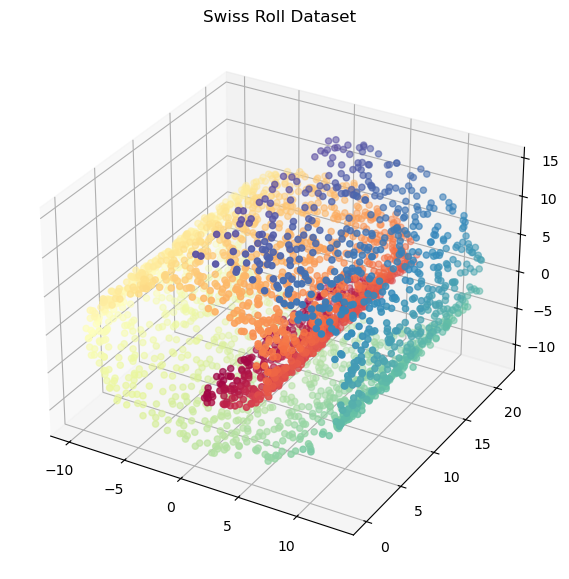

In [16]:
#Q2: Plot the generated Swiss roll dataset

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.get_cmap('Spectral'))
ax.set_title("Swiss Roll Dataset")
plt.show()

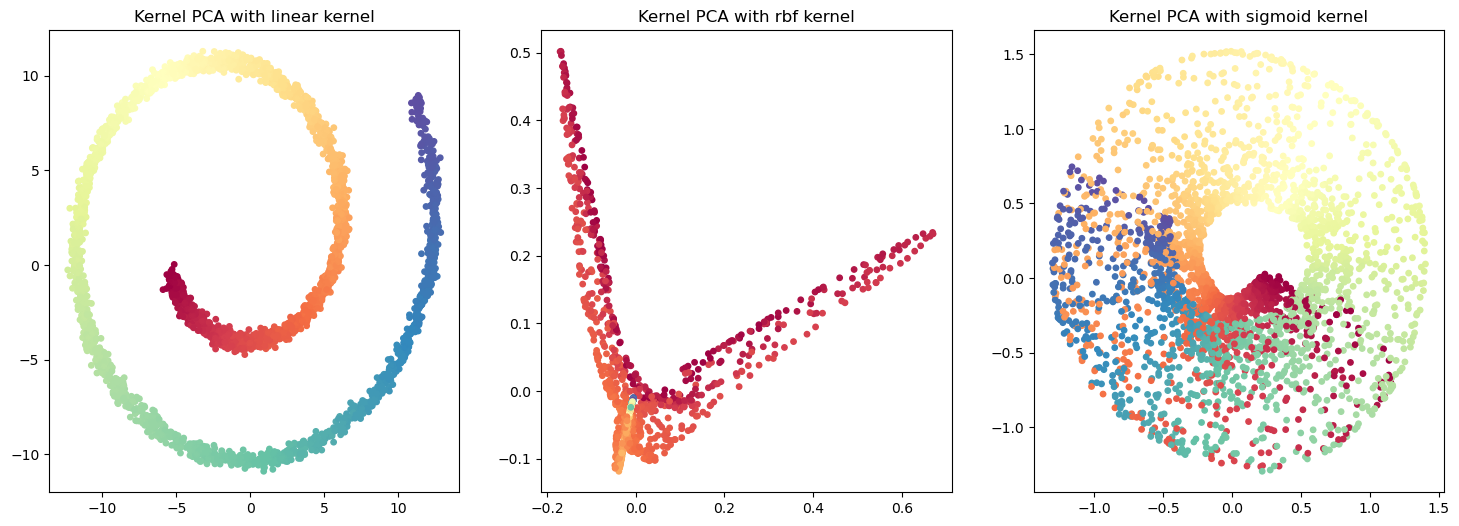

In [17]:
#Q3: Applying Kernel PCA with different kernels

# List of kernels
kernels = ['linear', 'rbf', 'sigmoid']

# Create subplots for visualizing the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#Q4: Apply KernelPCA and plot the results for each kernel
for i, kernel in enumerate(kernels):
    kpca = KernelPCA(n_components=2, kernel=kernel)
    X_kpca = kpca.fit_transform(X)
    
    axes[i].scatter(X_kpca[:, 0], X_kpca[:, 1], c=t, cmap=plt.get_cmap('Spectral'), s=15)
    axes[i].set_title(f"Kernel PCA with {kernel} kernel")

plt.show()


In [18]:
# Q5: Apply Logistic Regression with Kernel PCA and GridSearchCV to find the best parameters

from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, t_train, t_test = train_test_split(X, t > 6, test_size=0.2, random_state=42) # Binary classification

# Create a pipeline with StandardScaler, KernelPCA, and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

# Parameter grid for GridSearchCV
param_grid = [
    {
        'kpca__kernel': ['rbf', 'sigmoid'],
        'kpca__gamma': np.linspace(0.01, 0.1, 10)
    }
]

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3)
grid_search.fit(X_train, t_train)

# Best parameters found
best_params = grid_search.best_params_

# Print best parameters and evaluate on test set
best_params, grid_search.score(X_test, t_test)

({'kpca__gamma': 0.01, 'kpca__kernel': 'rbf'}, 0.855)

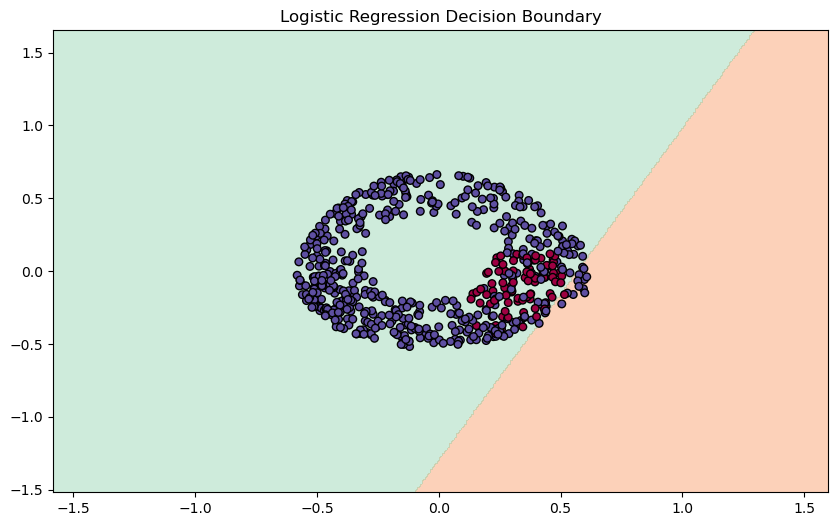

In [19]:
#Q6: Plotting the classification results using the best parameters
best_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01)
X_kpca_train = best_kpca.fit_transform(X_train)
X_kpca_test = best_kpca.transform(X_test)

# Train the logistic regression model on the transformed data
log_reg = LogisticRegression()
log_reg.fit(X_kpca_train, t_train)

# Plotting the decision boundary
def plot_decision_boundary(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.get_cmap('Spectral'))
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.get_cmap('Spectral'))
    ax.set_title("Logistic Regression Decision Boundary")

# Plot decision boundary for the test set
fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_boundary(X_kpca_test, t_test, log_reg, ax)
plt.show()